# Chapter 9: Quantum Circuits

Multi-qubit circuits, CNOT, SWAP, and controlled operations.

---

**Prerequisites:**
- See `Chapter02_QuantumSoftware.ipynb` for installation instructions


In [14]:
# Setup and imports
import numpy as np
import matplotlib.pyplot as plt

# Add utilities to path
from qiskit import QuantumCircuit
from IPython.display import display
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate
from qiskit.circuit.library.standard_gates.u import UGate
from qiskit_aer import Aer

from Chapter08_QuantumGates_functions import (simulate_statevector, simulate_measurements, runCircuitOnIBMQuantum, 
                                              analyzeCircuitForHardware, plot_measurement_results)

print('Setup complete!')

Setup complete!


## Multi-qubit circuit

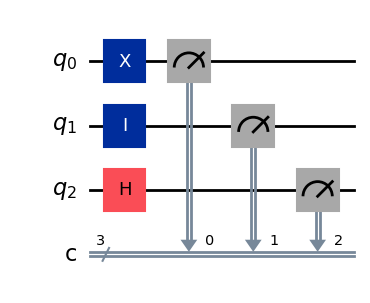

Counts: {'101': 491, '001': 509}


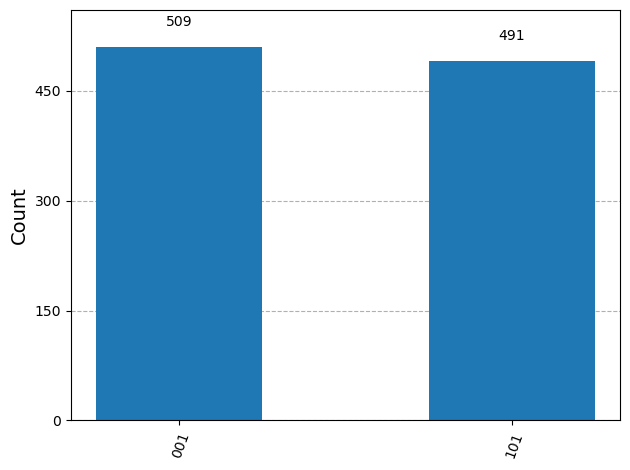

In [2]:
circuit = QuantumCircuit(3, 3)  
circuit.x(0)
circuit.id(1)
circuit.h(2)
circuit.measure([0,1,2], [0,1,2]) 
display(circuit.draw('mpl'))
counts = simulate_measurements(circuit)
print('Counts:',counts)
plot_histogram(counts)

## Multi-qubit, theoretical state

In [22]:
circuit = QuantumCircuit(3, 3)  
circuit.x(0)
circuit.id(1)
circuit.h(2)
psi = Statevector(circuit)
display(psi.draw('latex'))

<IPython.core.display.Latex object>

## Unitary operator

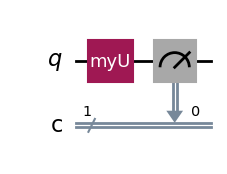

Counts: {'1': 488, '0': 512}


In [ ]:
circuit = QuantumCircuit(1, 1) 
UMatrix = 1/np.sqrt(2)*np.array([[1,1],[1j,-1j]]) 
circuit.unitary(UMatrix,0,'myU')
circuit.measure(0,0) 
# To see the theoretical state, comment the previous line and uncomment next 2 lines
# psi = Statevector(circuit)
# display(psi.draw('latex'))
display(circuit.draw('mpl'))
counts = simulateCircuit(circuit)
print('Counts:',counts)

## Universal operator

In [ ]:
def UniversalOperator(theta,phi,lambdaAngle):
	U = np.array([[np.cos(theta/2),-np.exp(1j*lambdaAngle)*np.sin(theta/2)],
			      [np.exp(1j*phi)*np.sin(theta/2), np.exp(1j*(phi+lambdaAngle))*np.cos(theta/2)]])
	return U

U = UniversalOperator(np.pi/2,np.pi,np.pi)
print(U)
U = UniversalOperator(np.pi,0,0)
print(U)

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [-0.70710678+8.65956056e-17j  0.70710678-1.73191211e-16j]]
[[ 6.123234e-17+0.j -1.000000e+00-0.j]
 [ 1.000000e+00+0.j  6.123234e-17+0.j]]


## CNOT Operator

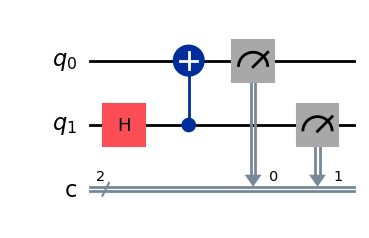

Counts: {'00': 507, '11': 493}


In [ ]:
circuit = QuantumCircuit(2, 2)  
circuit.h(1) 
circuit.cx(1,0)
circuit.measure([0,1], [0,1]) 
display(circuit.draw('mpl'))
counts = simulateCircuit(circuit)
print('Counts:',counts)

## Unitary operator of a circuit

In [ ]:
circuit = QuantumCircuit(2, 2)  
circuit.cx(1,0)
U = Operator(circuit)
print("U: \n", U.data)

U: 
 [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


## Controlled Hadamard

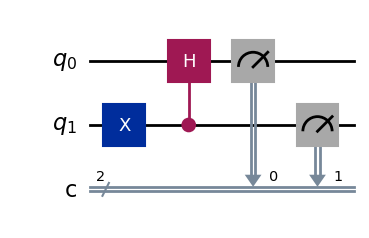

Counts: {'11': 483, '10': 517}


In [ ]:
circuit = QuantumCircuit(2, 2)  
circuit.x(1) # try id(1), h(1)
circuit.ch(1,0)
circuit.measure([0,1], [0,1]) 
display(circuit.draw('mpl'))
counts = simulateCircuit(circuit)
print('Counts:',counts)

### CNOT and Controlled Hadamard

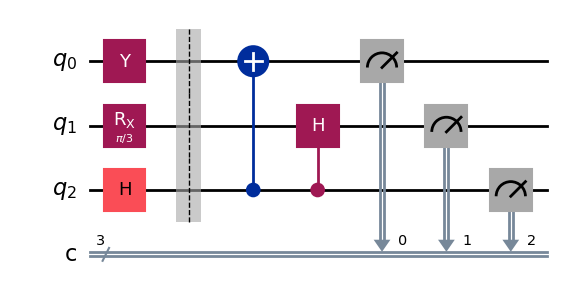

Counts: {'110': 2435, '001': 3824, '100': 2491, '011': 1250}


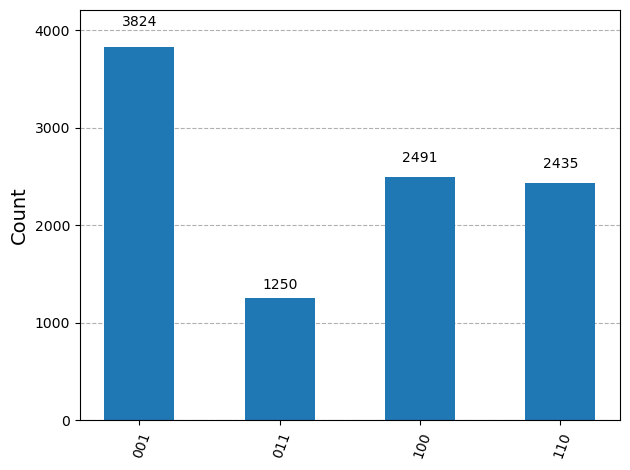

In [ ]:
circuit = QuantumCircuit(3, 3) 
circuit.y(0) 
circuit.rx(np.pi/3,1) 
circuit.h(2) 
circuit.barrier()
circuit.cx(2,0)
circuit.ch(2,1)
circuit.measure([0,1,2], [0,1,2]) 
display(circuit.draw('mpl'))
counts = simulateCircuit(circuit,shots = 10000)
print('Counts:',counts)
plot_histogram(counts)

### Controlled Phase

<IPython.core.display.Latex object>

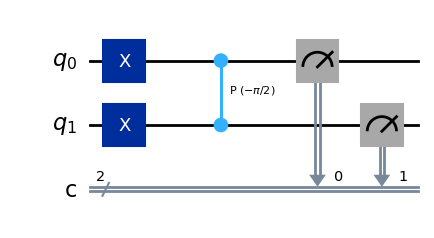

Counts: {'11': 1000}


In [ ]:
circuit = QuantumCircuit(2, 2)  
circuit.x(0) 
circuit.x(1) 
circuit.cp(-np.pi/2,0,1)
psi = Statevector(circuit)
display(psi.draw('latex'))

circuit.measure([0,1], [0,1]) 
display(circuit.draw('mpl') )
counts = simulateCircuit(circuit)
print('Counts:',counts)

### Controlled Phase with Hadamard

<IPython.core.display.Latex object>

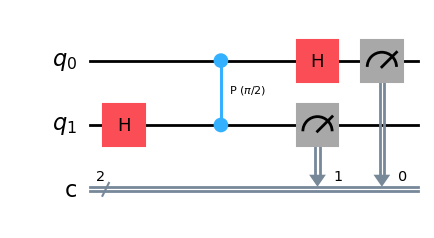

Counts: {'00': 250, '10': 254, '01': 250, '11': 246}


In [ ]:
circuit = QuantumCircuit(2, 2)  
circuit.h(1) 
circuit.cp(np.pi/2,0,1)
circuit.h(0) 
psi = Statevector(circuit)
display(psi.draw('latex'))

circuit.measure([0,1], [0,1]) 
display(circuit.draw('mpl')) 
counts = simulateCircuit(circuit)
print('Counts:',counts)


### Complex Circuit

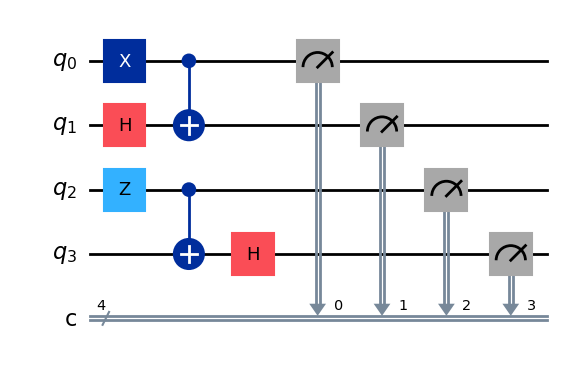

In [ ]:
circuit = QuantumCircuit(4, 4)  
circuit.x(0) 
circuit.h(1) 
circuit.z(2)
circuit.cx(0, 1)
circuit.cx(2, 3)
circuit.h(3)
circuit.cx
circuit.measure([0,1,2,3], [0,1,2,3]) 
display(circuit.draw('mpl') )

### Simple Swap

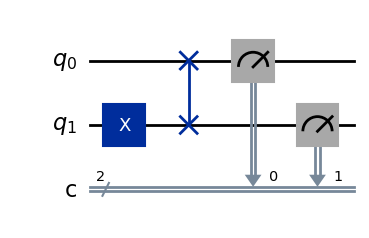

Counts: {'01': 1000}


In [ ]:
circuit = QuantumCircuit(2, 2)  
circuit.x(1) 
circuit.swap(1,0)
circuit.measure([0,1], [0,1]) 
display(circuit.draw('mpl'))
counts = simulateCircuit(circuit)
print('Counts:',counts)


### Controlled Unitary

<IPython.core.display.Latex object>

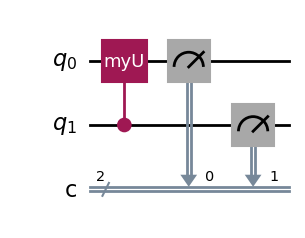

In [ ]:
circuit = QuantumCircuit(2, 2) 
UMatrix = 1/np.sqrt(2)*np.array([[1,1],[1j,-1j]]) 
U = UnitaryGate(UMatrix,'myU')
UControl = U.control(1)
circuit.append(UControl,[1,0])
psi = Statevector(circuit) #extract the state
display(psi.draw('latex')) # print
circuit.measure([0,1],[0,1]) 
display(circuit.draw('mpl'))

### Toffoli Gate

### State-controlled U Gate

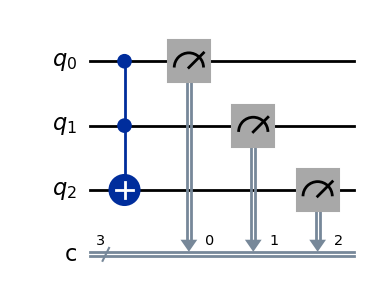

In [ ]:
circuit = QuantumCircuit(3, 3) 
circuit.ccx(0,1,2)
circuit.measure([0,1,2],[0,1,2])
display(circuit.draw('mpl')) 

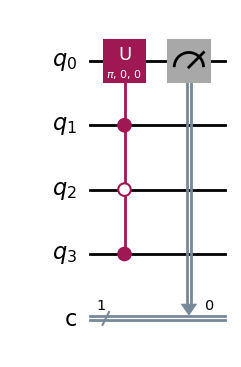

In [ ]:
circuit = QuantumCircuit(4, 1) 
cu_gate = UGate(np.pi, 0, 0).control(3, ctrl_state = '101')
# Not sure why the following does not work
# circuit.cry(theta = np.pi/3,target_qubit= 0,
#      control_qubit = [1,2,3], ctrl_state = '101')
circuit.append(cu_gate,[1,2,3,0])
circuit.measure([0],[0]) 
display(circuit.draw('mpl') )
